In [1]:
import pandas as pd

# all tensorboard logs were downloaded as a csv file
df_ppo_v1 = pd.read_csv('./tensorboard_logs/tensorboard_logs_PPO_v1.csv')
df_ppo_v2_full = pd.read_csv('./tensorboard_logs/tensorboard_logs_PPO_v2.csv')
df_ppo_v2 = df_ppo_v2_full.loc[df_ppo_v2_full['Step'] <= 400_000, :].reset_index(drop=True)
df_dqn = pd.read_csv('./tensorboard_logs/tensorboard_logs_DQN.csv')
df_a2c = pd.read_csv('./tensorboard_logs/tensorboard_logs_a2c.csv')

df_ppo_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Wall time  782 non-null    float64
 1   Step       782 non-null    int64  
 2   Value      782 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 18.5 KB


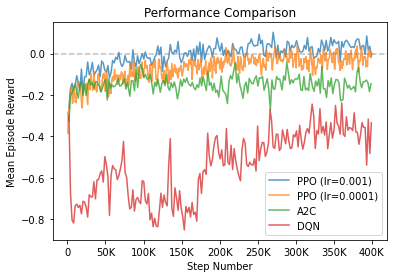

In [2]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

def format_ticks(x, pos):
    if x >= 1000:
        return f'{x*1e-3:,.0f}K'
    else:
        return f'{x:.0f}'

plt.plot(df_ppo_v2['Step'], df_ppo_v2['Value'], label='PPO (lr=0.001)', alpha=0.75)
plt.plot(df_ppo_v1['Step'], df_ppo_v1['Value'], label='PPO (lr=0.0001)', alpha=0.75)
plt.plot(df_a2c['Step'], df_a2c['Value'], label='A2C', alpha=0.75)
plt.plot(df_dqn['Step'], df_dqn['Value'], label='DQN', alpha=0.75)

plt.axhline(color='grey', linestyle='dashed', alpha=0.50)

plt.legend()

plt.title('Performance Comparison')
plt.xlabel('Step Number')
plt.ylabel('Mean Episode Reward')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

plt.show()

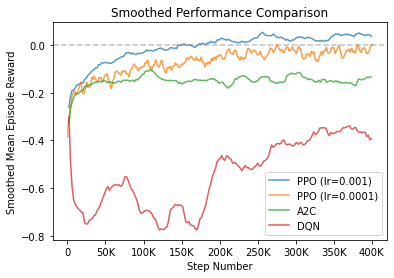

In [3]:
def rolling_average(data, *, window_size=10):
    """Smoothen the 1-d data array using a rollin average.

    Args:
        data: 1-d numpy.array
        window_size: size of the smoothing window

    Returns:
        smooth_data: a 1-d numpy.array with the same size as data
    """
    assert data.ndim == 1
    kernel = np.ones(window_size)
    smooth_data = np.convolve(data, kernel) / np.convolve(
        np.ones_like(data), kernel
    )
    return smooth_data[: -window_size + 1]

plt.plot(df_ppo_v2['Step'], rolling_average(df_ppo_v2['Value']), label='PPO (lr=0.001)', alpha=0.75)
plt.plot(df_ppo_v1['Step'], rolling_average(df_ppo_v1['Value']), label='PPO (lr=0.0001)', alpha=0.75)
plt.plot(df_a2c['Step'], rolling_average(df_a2c['Value']), label='A2C', alpha=0.75)
plt.plot(df_dqn['Step'], rolling_average(df_dqn['Value']), label='DQN', alpha=0.75)

plt.axhline(color='grey', linestyle='dashed', alpha=0.50)

plt.legend()

plt.title('Smoothed Performance Comparison')
plt.xlabel('Step Number')
plt.ylabel('Smoothed Mean Episode Reward')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

plt.show()

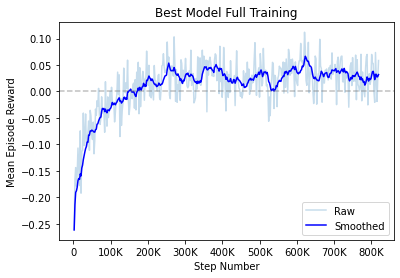

In [11]:
plt.plot(df_ppo_v2_full['Step'], df_ppo_v2_full['Value'], label='Raw', alpha=0.25)
plt.plot(df_ppo_v2_full['Step'], rolling_average(df_ppo_v2_full['Value']), label='Smoothed', color='blue')

plt.axhline(color='grey', linestyle='dashed', alpha=0.50)

plt.legend()

plt.title('Best Model Full Training')
plt.xlabel('Step Number')
plt.ylabel('Mean Episode Reward')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

plt.show()